In [1]:
%run data_downloader.py

Unziping files
Data loaded


In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

N.B.: I recommend that you use the `statsmodel` library to do the regression analysis as opposed to *e.g.* `sklearn`. The `sklearn` library is great for advanced topics, but it's easier to get lost in a sea of details and it's not needed for these problems.

# 1.  Polynomial regression using MPG data [25 pts, Peer Review]
We will be using Auto MPG data from UCI datasets (https://archive.ics.uci.edu/ml/datasets/Auto+MPG) to study polynomial regression.

In [3]:
columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
df = pd.read_csv("data/auto-mpg.data", header=None, delimiter=r"\s+", names=columns) 
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 1a) Clean the data [5 pts] 

1. Fix data types
2. Remove null or undefined values 
3. Drop the column car_name

Replace the data frame with the cleaned data frame. Do not change the column names, and do not add new columns.

Hint: 1. Dtype of one column is incorrect.  

In [4]:
if "car_name" in df.columns:
    df = df.drop(columns="car_name")

df['horsepower'] = pd.to_numeric(df['horsepower'],errors="coerce")
df = df.dropna()
print(df.dtypes)


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
dtype: object


### 1b) Fit a simple linear regression model with a feature that maximizes $R^2$. [5 pts]
Which feature is the best predictor, and the resulting r-squared value? Update your answer below.

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model_year      0.580541
Name: mpg, dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.707
Model:                            OLS   Adj. R-squared (uncentered):              0.706
Method:                 Least Squares   F-statistic:                              942.2
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                   3.40e-106
Time:                        18:36:37   Log-Likelihood:                         -1573.0
No. Observations:                 392   AIC:                                      3148.
Df Residuals:                     391   BIC:                                      3152.
Df Model:                           1                                                  
Covaria

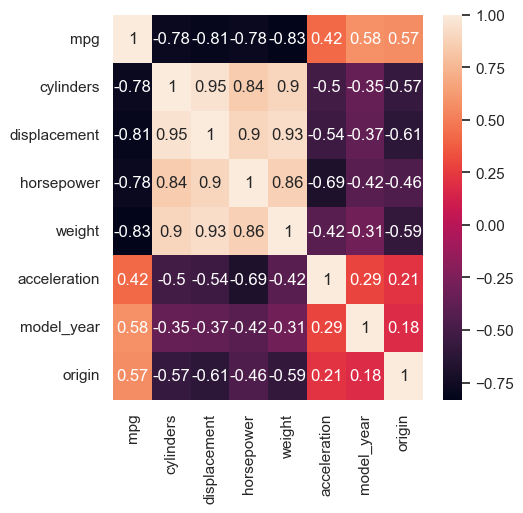

In [5]:
mpg_corr = df.corr()["mpg"].drop("mpg").sort_values()
print(mpg_corr)

top = [smf.ols(formula='mpg ~ {} -1'.format(predictor),data=df) for predictor in mpg_corr.index.values[:4]]

best_predictor=''
best_r_squared=0
for model in top:
    res = model.fit()
    if(res.rsquared>best_r_squared):
        best_r_squared = res.rsquared
        best_predictor = res.params.index[0]
    print(res.summary())

plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)

print(best_predictor)
print(best_r_squared)

### 1c) Using the feature found above (without normalizing), fit polynomial regression up to N=10 and report $R^2$. Which polynomial degree gives the best result?
Hint: For N-degree polynomial fit, **you have to include all orders upto N**. Use a for loop instead of running it manually. The `statsmodels.formula.api` formula string can understand **`np.power(x,n)`** function to include a feature representing $x^n$.

For example, the formula for n = 4 ---> mpg ~ weight + np.power(weight,2) + np.power(weight,3) + np.power(weight,4)

In [6]:
def build_formula(degree:int, variable:str):
    formula = 'mpg ~ {}'.format(variable)
    to_power = ' + np.power({},{})'
    for i in range(2,degree+1):
        formula += to_power.format(variable,i)
    return smf.ols(formula=formula,data=df)

polinomial_models = [build_formula(i,best_predictor) for i in range(1,11)]
best_r_squared =0
best_degree = 0
results = []
for i, model in enumerate(polinomial_models):
    res = model.fit()
    if(res.rsquared>best_r_squared):
        best_r_squared = res.rsquared
        best_degree = i
    results.append(res)
    print("Degree: {}, r^2 {}".format(i+1,res.rsquared))
print("-"*10)
print("Best degree {}, with r^2 {}".format(best_degree,best_r_squared))
sound_degree = 1

Degree: 1, r^2 0.6926304331206254
Degree: 2, r^2 0.7151475557845138
Degree: 3, r^2 0.7151495954869247
Degree: 4, r^2 0.7148116310613754
Degree: 5, r^2 0.6934461042232893
Degree: 6, r^2 0.5888075333312452
Degree: 7, r^2 0.2964066641959662
Degree: 8, r^2 -0.28778833738983356
Degree: 9, r^2 -1.1855766593382158
Degree: 10, r^2 -2.286018664051038
----------
Best degree 2, with r^2 0.7151495954869247


In [7]:
for result in results:
    print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Mon, 27 Mar 2023   Prob (F-statistic):          6.02e-102
Time:                        18:36:37   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.0

In the following problem, you will construct a simple multi-linear regression model, identify interaction terms and use diagnostic plots to identify outliers in the data. The original problem is as described by John Verzani in the [excellent tutorial 'SimplR' on the R statistics language](https://cran.r-project.org/doc/contrib/Verzani-SimpleR.pdf) and uses data from the 2000 presidential election in Florida. The problem is interesting because it contains a small number of highly leveraged points that influence the model.